In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

raw_dataset = pd.read_csv("../data/fra_cleaned.csv", delimiter=';', on_bad_lines='skip', encoding_errors='ignore', decimal=',')

/Users/abdullah/Python_Projects/fragrance-generator/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
dataset = raw_dataset.copy()
dataset.tail()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
24058,https://www.fragrantica.com/perfume/o-boticari...,floratta,o-boticario,Brazil,women,4.81,31,1992.0,"ozonic notes, peach","lily-of-the-valley, jasmine","musk, amber",thierry lecoule,NaN,white floral,ozonic,fresh,musky,powdery
24059,https://www.fragrantica.com/perfume/sultan-pas...,cheval-d-arabie,sultan-pasha-attars,UK,unisex,4.81,26,2020.0,"taif rose, indian oud, white rose, olibanum, e...","bulgarian rose, indian oud, hay, leather, cive...","white amber, leather, hay, elemi resin, kyara ...",sultan pasha,NaN,rose,amber,fresh spicy,animalic,aromatic
24060,https://www.fragrantica.com/perfume/darkbeat-p...,khaox,darkbeat-parfums,Spain,unisex,4.85,26,2020.0,"mint, lime, rum","lily-of-the-valley, fig leaf, cardamom","musk, oakmoss, amber, patchouli",jos m. giraldo,NaN,green,aromatic,citrus,fresh spicy,woody
24061,https://www.fragrantica.com/perfume/parfumerie...,aoud-no-1,parfumerie-bruckner,Germany,unisex,4.86,28,2011.0,"apple, peach, saffron","plum, orange blossom, jasmine","agarwood (oud), sandalwood, vanilla",unknown,NaN,fruity,sweet,oud,woody,powdery
24062,https://www.fragrantica.com/perfume/nilafar-du...,narmar-extrait-de-parfum,nilafar-du-nil,Egypt,men,4.93,30,2022.0,"cardamom, lavender, juniper, bergamot, clary sage","cashmeran, rose, green tea, lily, cinnamon","cashmeran, tobacco, oakmoss, suede, tonka bean...",unknown,NaN,aromatic,woody,warm spicy,musky,fresh spicy


In [3]:
dataset.pop('Perfumer2')
dataset['Notes'] = dataset[dataset.columns[8:10]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
dataset['Notes'] = dataset['Notes'].str.split(",")
dataset.pop('Top')
dataset.pop('Middle')
dataset.pop('Base')
dataset['NoteCount'] = dataset.Notes.apply(lambda x: len(x))
dataset.pop('Notes')

dataset.isna().sum()

url                0
Perfume            0
Brand              0
Country            0
Gender             0
Rating Value       0
Rating Count       0
Year            2037
Perfumer1          0
mainaccord1        0
mainaccord2       13
mainaccord3      114
mainaccord4      388
mainaccord5      981
NoteCount          0
dtype: int64

In [4]:
dataset = dataset.dropna()  

In [5]:
dataset = pd.get_dummies(dataset, columns=['Brand', 'Country', 'Gender', 'Perfumer1', 'mainaccord1', 'mainaccord2', 'mainaccord3', 'mainaccord4', 'mainaccord5'], prefix=' ', prefix_sep='', dtype=float)

In [6]:
dataset.tail()

,url,Perfume,Rating Value,Rating Count,Year,NoteCount,a-dozen-roses,a-lab-on-fire,a-n-other,a13,...,vanilla,vinyl,violet,vodka,warm spicy,whiskey,white floral,wine,woody,yellow floral
24058,https://www.fragrantica.com/perfume/o-boticari...,floratta,4.81,31,1992.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24059,https://www.fragrantica.com/perfume/sultan-pas...,cheval-d-arabie,4.81,26,2020.0,15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24060,https://www.fragrantica.com/perfume/darkbeat-p...,khaox,4.85,26,2020.0,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24061,https://www.fragrantica.com/perfume/parfumerie...,aoud-no-1,4.86,28,2011.0,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24062,https://www.fragrantica.com/perfume/nilafar-du...,narmar-extrait-de-parfum,4.93,30,2022.0,10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


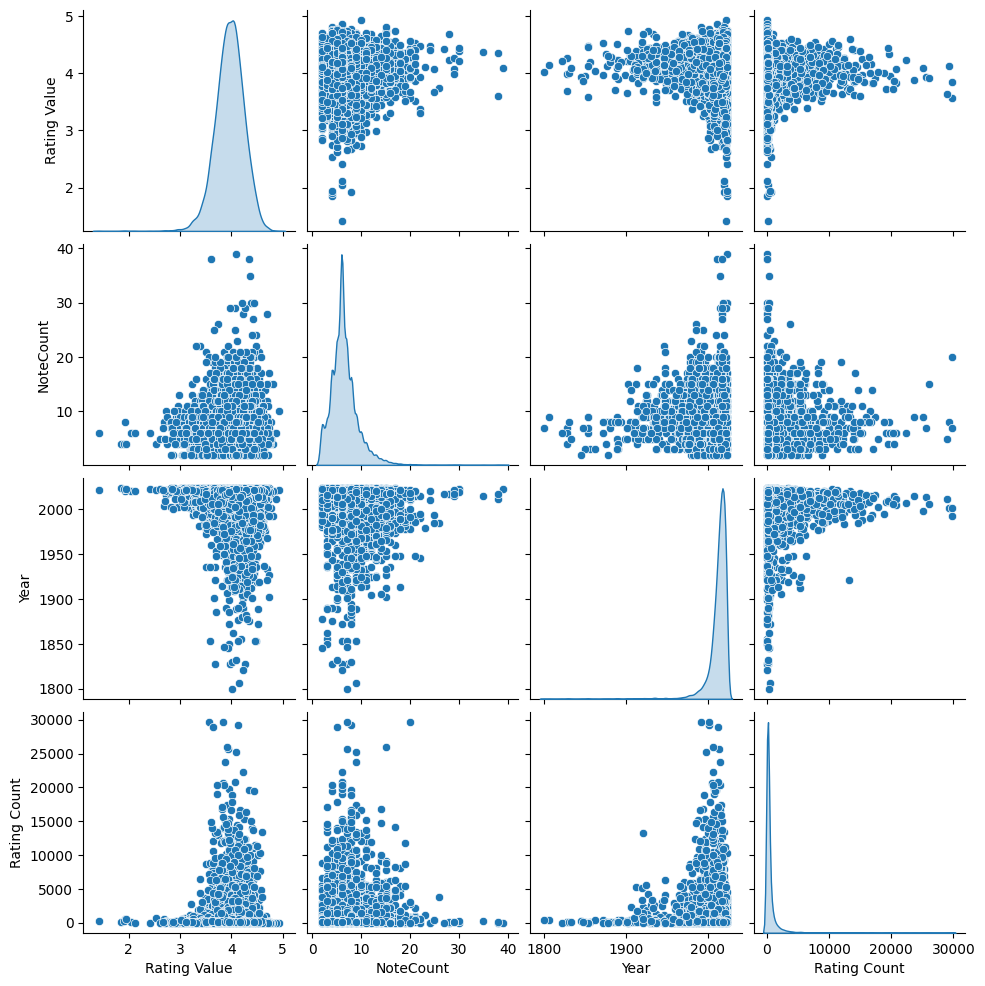

In [8]:
sns.pairplot(train_dataset[['Rating Value', 'NoteCount', 'Year', 'Rating Count']], diag_kind='kde')

In [9]:
train_dataset.pop('url')
train_dataset.pop('Perfume')
test_dataset.pop('url')
test_dataset.pop('Perfume')
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating Value,16930.0,3.962618,0.275985,1.42,3.79,3.97,4.15,4.93
Rating Count,16930.0,536.358181,1476.548420,26.00,60.00,138.00,399.00,29722.00
Year,16930.0,2012.336621,13.597769,1800.00,2010.00,2015.00,2019.00,2024.00
NoteCount,16930.0,6.502304,2.797584,2.00,5.00,6.00,8.00,39.00
a-dozen-roses,16930.0,0.000118,0.010869,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
whiskey,16930.0,0.000591,0.024297,0.00,0.00,0.00,0.00,1.00
white floral,16930.0,0.034968,0.183703,0.00,0.00,0.00,0.00,1.00
wine,16930.0,0.000177,0.013311,0.00,0.00,0.00,0.00,1.00
woody,16930.0,0.080508,0.272086,0.00,0.00,0.00,0.00,1.00


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Rating Value')
test_labels = test_features.pop('Rating Value')

In [11]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Rating Value,3.962618,0.275985
Rating Count,536.358181,1476.548420
Year,2012.336621,13.597769
NoteCount,6.502304,2.797584
a-dozen-roses,0.000118,0.010869
...,...,...
whiskey,0.000591,0.024297
white floral,0.034968,0.183703
wine,0.000177,0.013311
woody,0.080508,0.272086
